In [1]:
import numpy as np
from cross_validation import cross_validation

X_train = np.load("pure_features.npy")
y_train = np.load("log_y.npy")
print(X_train.shape)
print(y_train.shape)

(250000, 15)
(250000,)


In [2]:
y_train

array([1., 0., 0., ..., 1., 0., 0.])

# 1) Data Imputation

In [3]:
for i in range(X_train.shape[1]):
    X_train[np.where(X_train[:,i] == -999)[0], i] = np.median(X_train[np.where(X_train[:,i] != -999)[0], i])

# 2) Polynomial Features

In [4]:
degree = 7

for i in range(X_train.shape[1]):
    for j in range(2, degree+1):
        new_col = X_train[:,i]**j
        X_train = np.column_stack((X_train, new_col))

X_train.shape

(250000, 105)

In [5]:
# Rank of train set must be equal to the feature number
# in order not to have Rank deficiency veya ill condition.

print("X_train rank: {}".format(np.linalg.matrix_rank(X_train)))
print(X_train.shape)

X_train rank: 6
(250000, 105)


# 3) Data Normalization

In [6]:
# In the test section
for i in range(X_train.shape[1]):
    col_val = X_train[:, i]
    X_train[:, i] = (col_val - np.min(col_val)) / (np.max(col_val) - np.min(col_val)) 
    
print(X_train.min())
print(X_train.max())

0.0
1.0


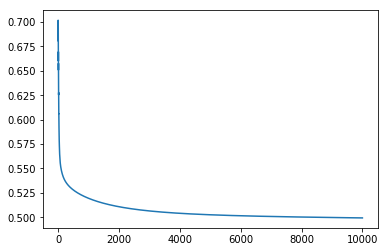

In [178]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(losses)

In [177]:
from implementations import logistic_regression
np.random.seed(23)
w, losses = logistic_regression(y_train, X_train, np.zeros(105), 10000, 6e-6)

100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter completed
100 iter com

In [197]:
from gradient import sigmoid
predictions = sigmoid(np.dot(X_train, w))
predictions[predictions > 0.5] = 1
predictions[predictions <= 0.5] = 0
predictions

array([0., 0., 0., ..., 0., 0., 0.])

In [198]:
y_train

array([1., 0., 0., ..., 1., 0., 0.])

In [199]:
from cross_validation import accuracy

accuracy(predictions, y_train)

0.753944

In [165]:
from proj1_helpers import load_csv_data

test_set = load_csv_data('../test.csv')
y_test, X_test, ids, columns = test_set

print("Test_X shape: {}".format(X_test.shape))
print("\nTest_Y shape: {}".format(y_test.shape))
print("\nColumn names: {}".format(columns))
print("\nColumn shape: {}".format(columns.shape))

n_features = len(columns)

Test_X shape: (568238, 30)

Test_Y shape: (568238,)

Column names: ['DER_mass_MMC' 'DER_mass_transverse_met_lep' 'DER_mass_vis' 'DER_pt_h'
 'DER_deltaeta_jet_jet' 'DER_mass_jet_jet' 'DER_prodeta_jet_jet'
 'DER_deltar_tau_lep' 'DER_pt_tot' 'DER_sum_pt' 'DER_pt_ratio_lep_tau'
 'DER_met_phi_centrality' 'DER_lep_eta_centrality' 'PRI_tau_pt'
 'PRI_tau_eta' 'PRI_tau_phi' 'PRI_lep_pt' 'PRI_lep_eta' 'PRI_lep_phi'
 'PRI_met' 'PRI_met_phi' 'PRI_met_sumet' 'PRI_jet_num'
 'PRI_jet_leading_pt' 'PRI_jet_leading_eta' 'PRI_jet_leading_phi'
 'PRI_jet_subleading_pt' 'PRI_jet_subleading_eta' 'PRI_jet_subleading_phi'
 'PRI_jet_all_pt']

Column shape: (30,)


In [166]:
selected_features = np.sort([0,4,5,6,12,23,3,9,11,1,10,13,21,22,29])
X_test = X_test[:, selected_features]
X_test.shape

(568238, 15)

In [167]:
for i in range(X_test.shape[1]):
    X_test[np.where(X_test[:,i] == -999)[0], i] = np.median(X_test[np.where(X_test[:,i] != -999)[0], i])
    
X_test.shape

(568238, 15)

In [168]:
log_transformed_columns = [3,9,13,21,29,5,23]
dummy = np.zeros(X_test.shape[0]).reshape(X_test.shape[0], -1)

for x, i in enumerate(selected_features):
    
    added_column = np.zeros(X_test.shape[0])
    
    if i in log_transformed_columns:
        if i in [5,23]:
            added_column[np.where(X_test[:,x] != -999)] = np.log(X_test[np.where(X_test[:,x] != -999),x] + 1)
            added_column[np.where(X_test[:,x] == -999)] = -999
        else:
            added_column = np.log(X_test[:, x] + 1)
    else:
        added_column = X_test[:, x]
        
    dummy = np.column_stack((dummy, added_column))

X_test = np.delete(dummy,0,1)
X_test.shape

(568238, 15)

In [169]:
degree = 7

for i in range(X_test.shape[1]):
    for j in range(2, degree+1):
        new_col = X_test[:,i]**j
        X_test = np.column_stack((X_test, new_col))

X_test.shape

(568238, 105)

In [170]:
for i in range(X_test.shape[1]):
    col_val = X_test[:, i]
    X_test[:, i] = (X_test[:, i] - np.min(col_val)) / (np.max(col_val) - np.min(col_val)) 
    
print(X_test.shape)
print(X_test.min())
print(X_test.max())

(568238, 105)
0.0
1.0


In [172]:
predictions

array([-1., -1.,  1., ..., -1.,  1., -1.])

In [171]:
predictions = sigmoid(np.dot(X_test, w))
predictions[predictions >= 0.45] = 1
predictions[predictions < 0.45] = 0
predictions[predictions == 0] = -1

In [173]:
from proj1_helpers import create_csv_submission

create_csv_submission(ids, predictions, 'output.csv')

1) threshold = 0.4, 7 degree polynomial, test set normalization w/ test set values, imputation, 0.72216

2) threshold = 0.45, 7 degree polynomial, test set normalization w/ test set values, 5000epoch imputation, 0.72216

